# Latex Headers

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\adagger}[0]{\hat{a}^{\dagger}}$$
$$\newcommand{\ahat}[0]{\hat{a}}$$
$$\newcommand{\bdagger}[0]{\hat{b}^{\dagger}}$$
$$\newcommand{\bhat}[0]{\hat{b}}$$
$$\newcommand{\cdagger}[0]{\hat{c}^{\dagger}}$$
$$\newcommand{\chat}[0]{\hat{c}}$$
$$\newcommand{\ddagger}[0]{\hat{d}^{\dagger}}$$
$$\newcommand{\dhat}[0]{\hat{d}}$$

# Cell Width Adjust

 - Execute the code below to adjust the width of the cells when editing.  
 - These cells will not be published to the book and are for editing convenience.

In [1]:
width = 70 #Width as a percentage of the screen

from IPython.display import display, HTML
display(HTML("<style>.jp-CodeCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-MarkdownCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-Cell-outputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))

# EXTRAS -- Homodyne Detection

In Part 1 we explored single-photon interference and the Hong-Ou-Mandel effect.  Here in Part 2 we build on several of the core concepts introduced in Part 1, such as beam-combining and interference, to explore homodyne detection of quantum fields.  We will then show how one can use homodyne detection in combination with squeezed states to make distance measurements with extremely high sensitivity.

## Homodyne Detection

Let's consider a configuration in {numref}`homodyne-detection-setup`.  This is similar to the one used to demonstrate the Hong-Ou-Mandel effect, but with a few key changes.  First, we can drive on input of the beamsplitter with a coherent state $\ket{\alpha}_a$.  Second, we let the second input be an arbitrary state $\ket{\psi}_b$.  Third, instead of examining coincidence events, we rather examine the subtraction of the photocurrents between ports $d$ and $c$. This configuration is shown pictorally below.

:::{figure-md} homodyne-detection-setup
<img src="./FIGURES/homodyne-detection-setup.png" alt="homodyne-detection-setup" class="bg-primary mb-1" width="400px">

Experimental setup for homodyne detection.  
:::

Given all inputs have the same frequency, this scheme is referred to as a balanced homodyne detection scheme.  It allows us to measure the field observable $B^{(\theta)}$ of the state $\ket{\psi}_b$.  Let's see how.

```{note}
Note that we have again used the convention of labeling all operators with the letter corresponding to the mode label for convenience and clarity.  Thus $B^{(\theta)}$ corresponds to the average observed field of the state in port $b$.  
```

First note that as a result of the beamsplitter

$$ \chat = \frac{\ahat + \bhat}{\sqrt{2}} $$

and

$$ \dhat = \frac{\ahat - \bhat}{\sqrt{2}}. $$

We then find that we can use these relations to define an operator that represents the difference current between the detector in path $d$ and the one in path $c$.  We can do this by assuming that the detectors are 100% efficient, and thus the current would be directly proportional to the number of photons incident on each one.

$$ 
\hat{I}(\theta) \propto \hat{N}_c - \hat{N}_d = 
\frac{1}{2} 
\bigg \lbrace 
(\adagger + \bdagger)(\ahat + \bhat) - 
(\adagger - \bdagger)(\ahat - \bhat) 
\bigg \rbrace
$$

After a bit of simplfication, we find that 

$$ \hat{I}(\theta) \propto \adagger\bhat + \bdagger\ahat. $$

If we then take the input state to be $\ket{\alpha}_a\ket{\psi}_b$, we have that the average current is expressed as

$$ I(\theta) \propto \bra{\psi}_b \bra{\alpha}_a \adagger \bhat + \ahat \bdagger \ket{\alpha}_a \ket{\psi}_b = |\alpha|\bra{\psi}_b \bhat e^{-i\theta} + \bdagger e^{i\theta} \ket{\psi}_b $$

where we have taken $\alpha = |\alpha|e^{-i\theta}$.

Note that this means that 

$$ I(\theta) \propto 2 |\alpha|B^{(\theta)}, $$

meaning that the measured current can be directly related to the field in B in the quadrature defined by $\theta$.  One can simply scan the phase $\alpha$ (for example by inserting a wedge into the path of $a$) to measure the average field in in $b$ for all relative phase delays.  

Beyond mapping the average field, we can also examine the noise.  To do this, we then need something to correspond to $\hat{I}^2$.  

$$\hat{I}^2(\theta) \propto (\adagger \bhat + \bdagger \ahat)^2.  $$

Again, after some algebra, we wind up finding that 

$$ \langle \hat{I}^2(\theta) \rangle 
\propto 
|\alpha|^2 \bra{\psi}_b e^{i 2 \theta}\bhat\bhat + 1 + 2\bdagger\bhat + \bdagger\bdagger e^{-i2\theta} \ket{\psi_b} + N_b, $$

but, note, this is nothing more than

$$ \langle \hat{I}^2(\theta) \rangle 
\propto 
4 |\alpha|^2 {\hat{B}^{(\theta)}}^2 + N_b$$

Then remember that the noise is simply defined by the standard deviation of the output current, which is

$$ \Delta I(\theta) = \langle \hat{I}^2 \rangle - I^2 \propto 4 |\alpha|^2 \Delta B^{(\theta)}  + N_b $$

This is a really interesting set of results, so let's think about them a bit.  Basically, the signal $I$ is related directly to the field observable of the state in port $b$ for any quadrature defined by $\theta$.  In fact this state information has been enhanced by a factor of $2|\alpha|$ due to the large field of the coherent state.  The the noise of the differential current is simply the noise of the field observable of the state in port $b$ enhanced by a factor of $4|\alpha|^2$, with an extra contribution of $N_b$, the number of photons in the state in port $b$.  Note that if we are dealing with few-photon states, then this extra portion $N_b$ can be safely ignored.  This means, **balanced homodyne detection provides all information about the fields in port $b$**.  

Let's see what happens when we inject a squeezed state into port $b$.

```{note}
Clearly, there is an advantage to having a high intensity coherent state $\ket{\alpha}$.  However, one should note that there are technical limitations here, in particular is detector saturation.  As with any photodetection scheme, there is a limit to the average photon rate that can be detected by a given detector.  There are also bandwidth limitations to be considered.  These traditional limitations of optoelectronics still apply and must be considered.  As with all quantum engineering, there is still plenty of classical engineering to be taken into account!
```

## Homodyne Detection with Squeezed Light

We know from the basics section on {ref}`sec:quantum-optics-basics:squeezed-states` that squeezed light exhibits reduced field fluctuations along a particular quadrature.  We also now know that Homodyne detection can measure the field observable at input port $b$ along any quadratudre defined by the phase of the coherent state $\theta$.  

Let us start by referring back to the simplified squeezed state we had discussed in the basics section on  {ref}`sec:quantum-optics-basics:squeezed-states`.  

$$ \ket{\psi_s}_b = \sqrt{1 - s^2}\ket{0}_b - s\ket{2}_b.$$

From our prior analysis we know that the average field is zero for this squeezed state, thus

$$ I(\theta) \propto 2 |\alpha| B^{(\theta)} = 0,$$

and that the current noise can be expressed as

$$ \Delta I(\theta) \propto 4 |\alpha|^2 {\hat{B}^{(\theta)}}^2 + N_b
$$  

which, for our squeezed state is 

$$  \Delta I(\theta) = 4 |\alpha|^2 { \bigg \lbrace 1/4 - s \sqrt{\frac{(1 - s^2)}{2}} \cos(2 \theta) + s^2 \bigg \rbrace  }^{1/2} + N_b $$

As noted above, for a large enough $|\alpha|$, we can ignore $N_b$ here.

Let's now plot $\Delta I(\theta)$ given $s = 0.3$ (squeezed state) and $s = 0.0$ (vacuum state -- no input).

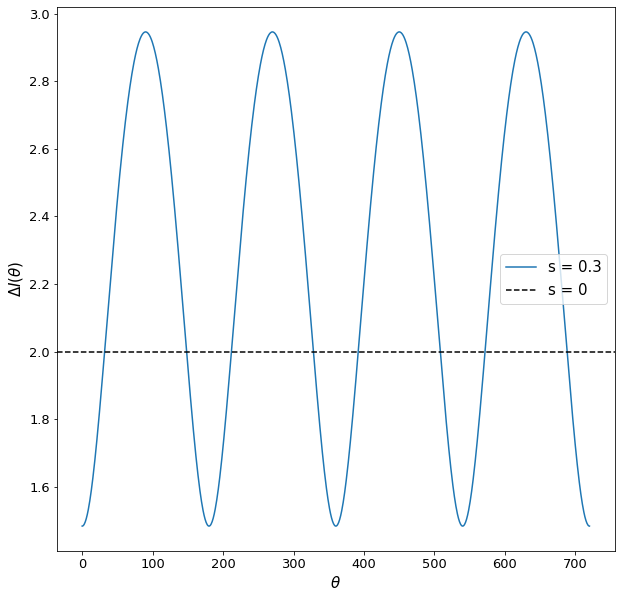

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from myst_nb import glue

fig = plt.figure()
ax = fig.add_subplot()


s = 0.3
theta = np.linspace(0, 4*np.pi, 1000)
delA = 4*np.sqrt(1/4 - s*np.sqrt((1 - s**2)/2)*np.cos(2*theta) + s**2)

ax.plot(theta*180/np.pi, delA, label="s = 0.3")
ax.axhline(2.0, color="black", linestyle="--", label="s = 0")

#ax.set_ylim(0, 1.55)
ax.set_xlabel(r'$\theta$', fontsize=15)
ax.set_ylabel(r'$\Delta I$($\theta$)', fontsize=15)
ax.tick_params(labelsize=13) 
ax.legend(fontsize=15)
    
#plt.gca().set_aspect('equal')

fig.set_size_inches(10, 10)

glue("homodyne_noise_squeezed_state", fig, display=False)

```{glue:figure} homodyne_noise_squeezed_state
:figwidth: 600px
:name: "fig-homodyne-noise-squeezed-state"

Noise of the differential output signal $\Delta I$ as we scan $\theta$.  Note that depending on the value of $\theta$ with the squeezed state input, the noise can be either significantly increased or decreased compared to the case of no input to port $b$ (i.e. pure vacuum state input corresponding to $s = 0$).  
```

Now we have shown that the noise at the output of a Homodyne detector can be reduced by injection of a squeezed state.  In the next section we examine how we can put this to use for quantum-enhanced measurements of mirror displacement.

## Quantum-Enhanced Displacement Measurements

Myriad precision instruments use laser-based interferometers to characterize ultra-small changes in the displacement of an object.  For example, precision stages sometimes use laser-based interferometers to obtain nanometer-level precision in their movement.  A rather famous example of precision displacement measurements is for LIGO, where kilometer-scale interferometers are used to measure changes in path lengths that measure just fractions of the width of one atom.  This marvel of measurements was made possible through incredible engineering which included the use of quantum-enhanced measurement techniques based on homodyne detection with squeezed states.  

:::{figure-md} displacement-meas-setup
<img src="./FIGURES/displacement-meas-setup.png" alt="displacement-meas-setup" class="bg-primary mb-1" width="800px">

Experimental setup for a quantum-enhanced displacment measurement.    
:::

In {numref}`displacement-meas-setup` we show how one can couple an interferometer to a homodyne detector for precision displacement measurements.  There are three key inputs to this system:

 1. A coherent state probe: $\ket{\alpha}$
 
 2. A squeezed state input: $\ket{\psi_s}$, and
 
 3. A coherent state local oscillator reference: $\ket{\beta}$
 
If the path length difference between the two arms changes by a distance of $\delta$, then this induces a phase change $\theta = 2 \pi \delta/\lambda$, where $\lambda$ is the wavelength of the light being used (we have assumed all three input states are of the same central wavelength).  With a bit of effort (which we will go through in detail in the example and problem set questions at the end of this chapter), we find that the measured output current.  Assuming $\delta$ is very small (much less than one wavelength), and for appropriate phase selection of the probe state $\ket{\alpha}$, the current can be approximated as  

$$ I \propto \frac{2\pi\delta |\alpha| |\beta|}{\lambda}$$

To see the general effect of squeezing, we can inject our example squeezed state into the system

$$ \ket{\psi_s} = \sqrt{1 - s^2} \ket{0} - s \ket{2},$$

resulting in the following approximate noise current (assuming large $\beta$)

$$ \Delta I^2 \propto |\beta|^2 (1 + 4s^2 - 2 s \sqrt{2(1-s^2)} \cos(2\phi - 2\pi \delta/\lambda).$$

This then leads to a signal to noise ratio of

$$ \text{SNR} = \frac{I^2}{\Delta I^2} = \frac{4 \pi^2 \delta^2 |\alpha|^2}{\lambda^2 (1 + 4s^2 - 2 s \sqrt{2(1-s^2)} \cos(2\phi - 2\pi \delta/\lambda)} $$

As for the simplified case of heterodyne detection of a squeezed state discussed above, the injection of a squeezed state into an interferometer for displacement measurement also has the effect of reducing the background noise. This noise reduction occurs **so long as the homodyne detector is measuring the displacement along the appropriate quadrature where the noise has been reduced.**  This is achieved by setting $\phi = 0$, where $\phi$ is the phase of $\ket{\beta}$.  

From a measurement perspective, we are interested in the value of $\delta$ where $\text{SNR} > 1$.  This value becomes an important metric for the lower limit of detection of the system.  So, again, let's pick the values of $s = 0$ and $s = 0.3$ as comparison points for the SNR as a function of $\delta$.  We assume a wavelength of 600 nm, and a probe photon rate of 100 photons per second.

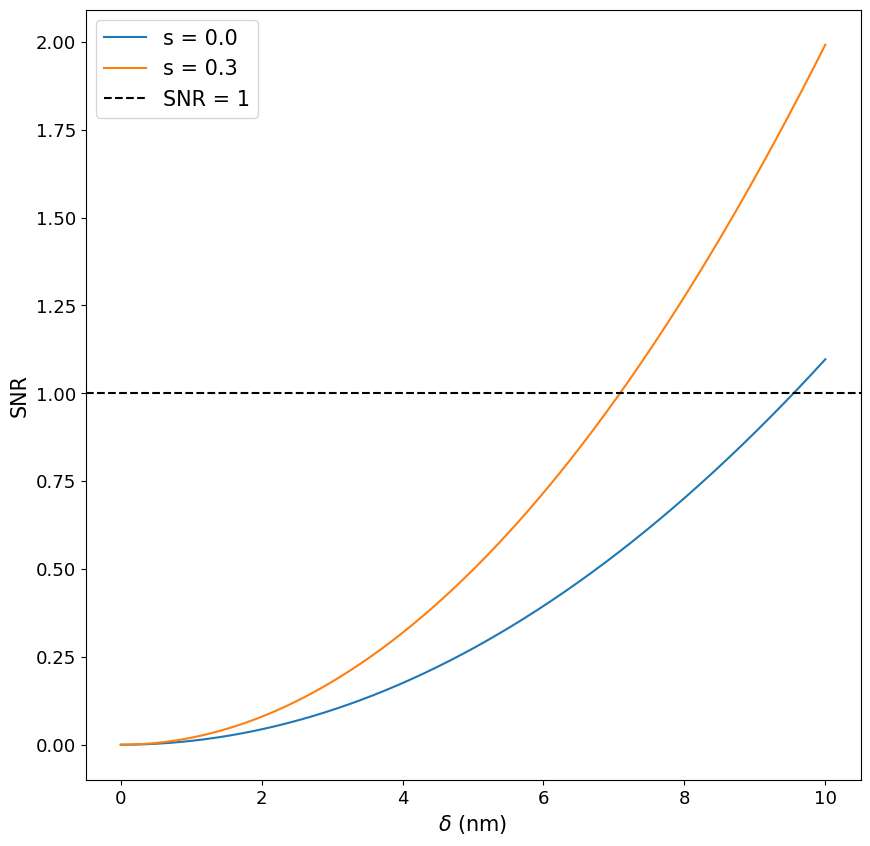

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from myst_nb import glue

fig = plt.figure()
ax = fig.add_subplot()


s = 0.0
delta = np.linspace(0, 10, 1000)
alpha2 = 100
y0 = 600
SNR_vac = 4*np.pi**2*delta**2*alpha2/(y0**2*(1 + 4*s**2 - 2*np.sqrt(2*(1 - s**2))*s))

s = 0.3
SNR_sqz = 4*np.pi**2*delta**2*alpha2/(y0**2*(1 + 4*s**2 - 2*np.sqrt(2*(1 - s**2))*s))

ax.plot(delta, SNR_vac, label="s = 0.0")
ax.plot(delta, SNR_sqz, label="s = 0.3")
ax.axhline(1.0, color="black", linestyle="--", label="SNR = 1")

#ax.set_ylim(0, 1.55)
ax.set_xlabel(r'$\delta$ (nm)', fontsize=15)
ax.set_ylabel(r'SNR', fontsize=15)
ax.tick_params(labelsize=13) 
ax.legend(fontsize=15)
    
#plt.gca().set_aspect('equal')

fig.set_size_inches(10, 10)

glue("displacement_LOD_squeezed_state", fig, display=False)

```{glue:figure} displacement_LOD_squeezed_state
:figwidth: 600px
:name: "fig-displacement-LOD-squeezed-state"

Signal to noise ratio of the homodyne output from an interferometer for measuremetn of displacement $\delta$ both with squeezing ($s = 0.3$) and without ($s = 0$).  Clearly, a squeezed state reduces the limits of detection beyond what is capable with purely classical input states. This reduction can be further enhanced with states exhibiting larger amounts of squeezing than what we used here for this example.  
```

By using advanced methods that produce squeezed states with much higher levels of squeezing than our toy state here, this can be even further improved.   As with all other examples, though, one must ensure that quantum fluctuations are the dominant source of noise.  **The limit in real life can often be set by thermal, mechanical, and other technical noise taht is not quantum in nature.**  There must also be significant engineering introduced to reduce these noise factors.